In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchwisdom.tabular import datasets
import pandas as pd
from torch.utils.data import DataLoader
from torchwisdom.tabular.trainer import *
from torchwisdom.tabular.collector import *
from torchwisdom.core.callback import AccuracyCallback, AccuracyTopKCallback, MSECallback, AccuracyRegressionCallback
import torchvision.transforms as transforms
import torchwisdom.tabular.transforms as ttrans
from torchwisdom.core.nn import functional as N

In [3]:
data = regression_dataset('data/boston/train.csv', target_columns='medv',  drop_columns=['ID'], use_normalization=False)

In [4]:
model = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(),
    nn.BatchNorm1d(64),
    nn.Linear(64, 128),
    nn.ReLU(),
    nn.BatchNorm1d(128),
    nn.Linear(128, 1)
)

epoch,trn_loss,val_loss,trn_acc_reg,val_acc_reg,time,remain
1,591.236206,574.296875,0.000000,0.000000,0:00:00.19,0:00:01.76
2,463.587402,314.190216,0.000000,0.000000,0:00:00.20,0:00:01.65
3,319.606873,147.262054,4.400000,1.500000,0:00:00.18,0:00:01.25
4,127.081604,19.556273,16.000000,83.500000,0:00:00.18,0:00:01.06
5,49.589947,73.676025,50.000000,31.000000,0:00:00.19,0:00:00.96
6,66.931793,17.987003,24.000000,57.500000,0:00:00.21,0:00:00.96
7,46.049786,26.511391,40.000000,56.000000,0:00:00.19,0:00:00.54
8,25.356966,15.512312,65.199997,80.000000,0:00:00.19,0:00:00.36
9,32.436592,46.302074,60.200001,19.500000,0:00:00.20,0:00:00.24
10,22.378752,12.312446,72.599998,83.500000,0:00:00.19,0:0


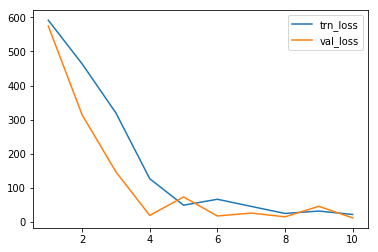

In [5]:
trainer = regressor_trainer(data, model)
trainer.fit(10, lr=0.02)

In [6]:
feat, targ = next(iter(data.validloader))

In [7]:
trainer.predict(tensor_data=feat[:10], target=targ[:10], show_table=True)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv_predict,medv_truth
0,1.51902,0.0,19.58,1.0,0.605,8.375,93.900002,2.1620,5.0,403.0,14.700000,388.450012,3.32,33.914749,50.000000
1,2.14918,0.0,19.58,0.0,0.871,5.709,98.500000,1.6232,5.0,403.0,14.700000,261.950012,15.79,15.120183,19.400000
2,15.02340,0.0,18.10,0.0,0.614,5.304,97.300003,2.1007,24.0,666.0,20.200001,349.480011,24.91,8.363522,12.000000
3,0.10008,0.0,2.46,0.0,0.488,6.563,95.599998,2.8470,3.0,193.0,17.799999,396.899994,5.68,30.700356,32.500000
4,5.66637,0.0,18.10,0.0,0.740,6.219,100.000000,2.0048,24.0,666.0,20.200001,395.690002,16.59,13.078945,18.400000
5,0.53412,20.0,3.97,0.0,0.647,7.520,89.400002,2.1398,5.0,264.0,13.000000,388.369995,7.26,33.499893,43.099998
6,0.33983,22.0,5.86,0.0,0.431,6.108,34.900002,8.0555,7.0,330.0,19.100000,390.179993,9.16,18.760290,24.299999
7,0.38735,0.0,25.65,0.0,0.581,5.613,95.599998,1.7572,2.0,188.0,19.100000,359.290009,27.26,15.090857,15.700000
8,0.18836,0.0,6.91,0.0,0.448,5.786,33.299999,5.1004,3.0,233.0,17.900000,396.899994,14.15,18.505800,20.000000
9,0.03306,0.0,5.19,0.0,0.515,6.059,37.299999,4.8122,5.0,224.0,20.200001,396.140015,8.51,21.649864,20.600000
